In [1]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt  

import tensorflow as tf 
from tensorflow.keras import models, layers 
from tensorflow.keras import losses, optimizers 
# from keras_visualizer import visualizer

import os
from tqdm import tqdm 

In [2]:
KERNEL_SIZE = 31

In [38]:
def generator(input_shape = 1000):
        
    inp = layers.Input(shape = input_shape)
    # transform = layers.Lambda(lambda x : np.expand_dims(x, -1) if len(x.shape) < 2)(inp)

    conv1 = layers.Conv1D(filters = 16, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv1')(inp)
    ac1 = layers.PReLU(name = 'activation1')(conv1)

    conv2 = layers.Conv1D(filters = 32, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv2')(ac1)
    ac2 = layers.PReLU(name = 'activation2')(conv2)

    conv3 = layers.Conv1D(filters = 32, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv3')(ac2)
    ac3 = layers.PReLU(name = 'activation3')(conv3)

    conv4 = layers.Conv1D(filters = 64, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv4')(ac3)
    ac4 = layers.PReLU(name = 'activation4')(conv4)

    conv5 = layers.Conv1D(filters = 64, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv5')(ac4) 
    ac5 = layers.PReLU(name = 'activation5')(conv5)

    conv6 = layers.Conv1D(filters = 128, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv6')(ac5)
    ac6 = layers.PReLU(name = 'activaton6')(conv6)

    conv7 = layers.Conv1D(filters = 128, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv7')(ac6)
    ac7 = layers.PReLU(name = 'activaton7')(conv7)

    conv8 = layers.Conv1D(filters = 256, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv8')(ac7)
    ac8 = layers.PReLU(name = 'activation8')(conv8)

    conv9 = layers.Conv1D(filters = 256, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv9')(ac8)
    ac9 = layers.PReLU(name = 'activation9')(conv9)

    conv10 = layers.Conv1D(filters = 512, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv10')(ac9)
    ac10 = layers.PReLU(name = 'activation10')(conv10)

    conv11 = layers.Conv1D(filters = 1024, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv11')(ac10)
    ac11 = layers.PReLU(name = 'activation11')(conv11)
    
    concat = layers.Lambda(lambda x : tf.concat([x, tf.random.normal(shape = x.shape)], 2))(ac11)

    conv12 = layers.Conv1D(filters = 32, kernel_size = KERNEL_SIZE, strides = 2, padding = 'same', name = 'conv12')(concat)

    gen = models.Model(inputs = inp, outputs = conv12)
    return gen


    

In [39]:
gen = generator(input_shape = [16384, 1])

ValueError: Cannot convert a partially known TensorShape to a Tensor: (None, 8, 1024)

In [33]:
gen.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 16384, 1)]        0         
_________________________________________________________________
conv1 (Conv1D)               (None, 8192, 16)          512       
_________________________________________________________________
activation1 (PReLU)          (None, 8192, 16)          131072    
_________________________________________________________________
conv2 (Conv1D)               (None, 4096, 32)          15904     
_________________________________________________________________
activation2 (PReLU)          (None, 4096, 32)          131072    
_________________________________________________________________
conv3 (Conv1D)               (None, 2048, 32)          31776     
_________________________________________________________________
activation3 (PReLU)          (None, 2048, 32)          6553

In [10]:
gen.outputs

[<KerasTensor: shape=(None, 8, 1024) dtype=float32 (created by layer 'activation11')>]

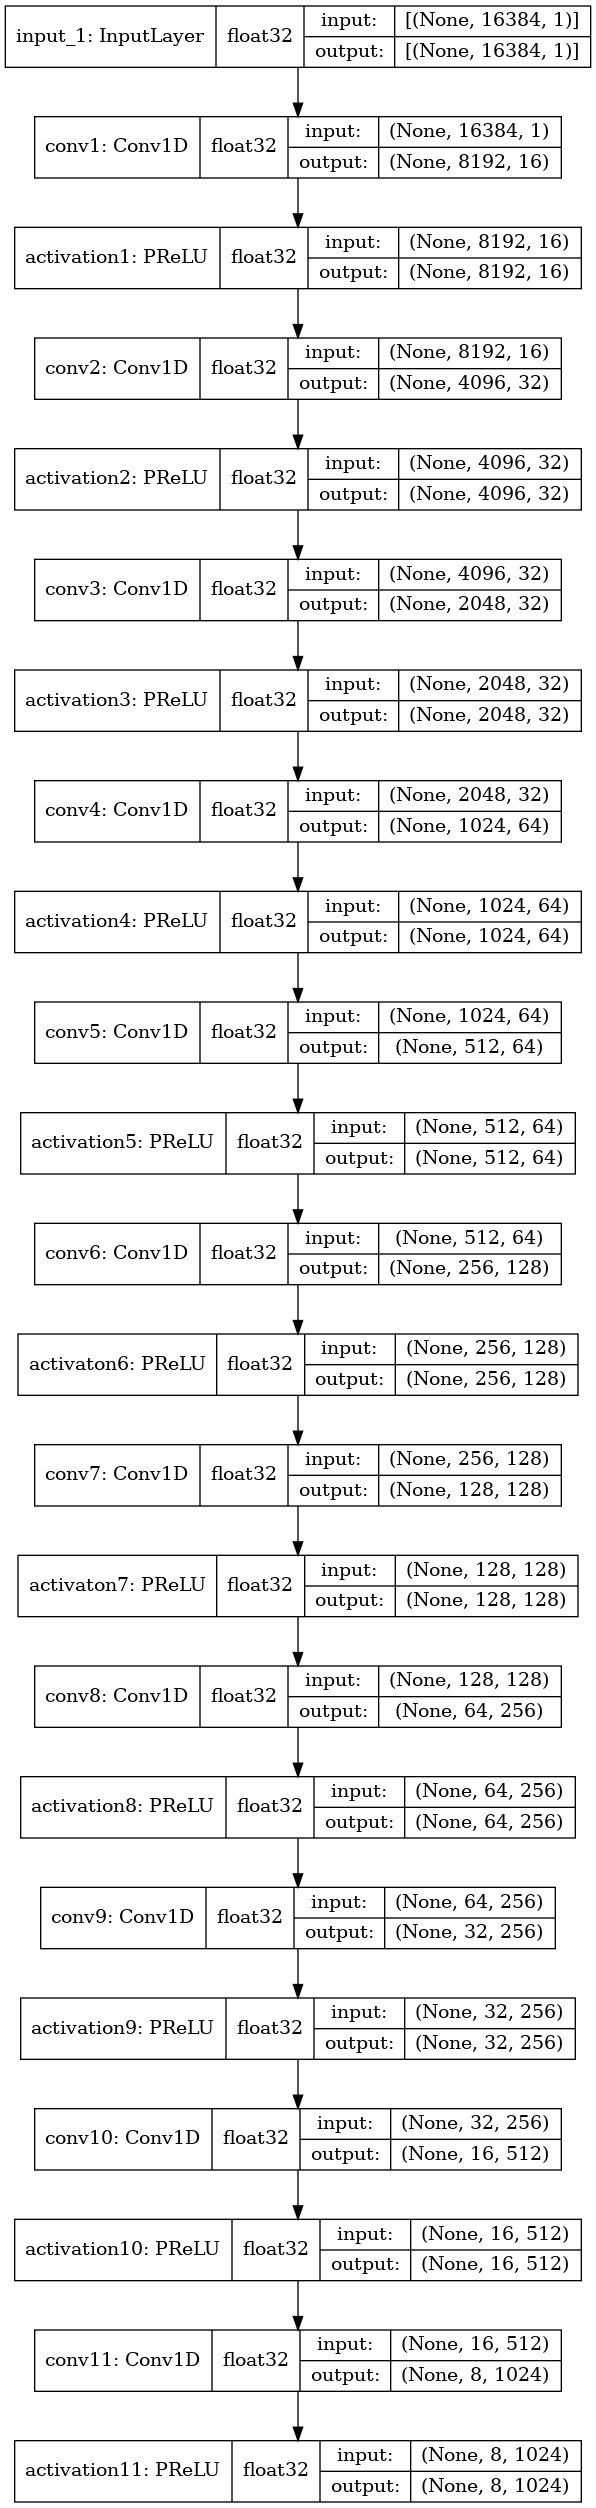

In [6]:
tf.keras.utils.plot_model(gen, show_shapes = True, show_dtype = True, expand_nested = True)